In [65]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import  train_test_split
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.metrics import  roc_curve
from sklearn.metrics  import roc_auc_score
from  sklearn.model_selection import  cross_val_score
from  sklearn.linear_model  import  LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
import graphviz
import scipy.stats as stats
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier

In [2]:
cc = pd.read_csv("creditcard.csv")

In [3]:
cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
cc.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
x =  cc.drop('Class',  axis=1).values
y =  cc['Class'].values

In [16]:
cc.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [30]:
xpd = pd.DataFrame(x)
xpd.columns

RangeIndex(start=0, stop=30, step=1)

In [17]:
v1 =  cc['V1'].values
v2 =  cc['V2'].values
v3 =  cc['V3'].values
v4 =  cc['V4'].values
v5 =  cc['V5'].values
v6 =  cc['V6'].values
v7 =  cc['V7'].values
v8 =  cc['V8'].values
v9 =  cc['V9'].values
v10 =  cc['V10'].values
v11 =  cc['V11'].values
v12 =  cc['V12'].values
v13 =  cc['V13'].values
v14 =  cc['V14'].values
v15 =  cc['V15'].values
v16 =  cc['V16'].values
v17 =  cc['V17'].values
v18 =  cc['V18'].values
v19 =  cc['V19'].values
v20 =  cc['V20'].values
v21 =  cc['V21'].values
v22 =  cc['V22'].values
v23 =  cc['V23'].values
v24 =  cc['V24'].values
v25 =  cc['V25'].values
v26 =  cc['V26'].values
v27 =  cc['V27'].values
v28 =  cc['V28'].values
amount =  cc['Amount'].values

In [9]:
logreg =  LogisticRegression()
x_train,  x_test, y_train,  y_test =  train_test_split(x, y, test_size=0.5,  random_state=144)
logreg.fit(x_train,  y_train)
y_pred =  logreg.predict(x_test)

In [10]:
cv_scores =  cross_val_score(logreg, x, y, cv=5,  scoring='roc_auc')
print(cv_scores)

[ 0.98368629  0.96378483  0.94945854  0.95052358  0.95925635]


In [23]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

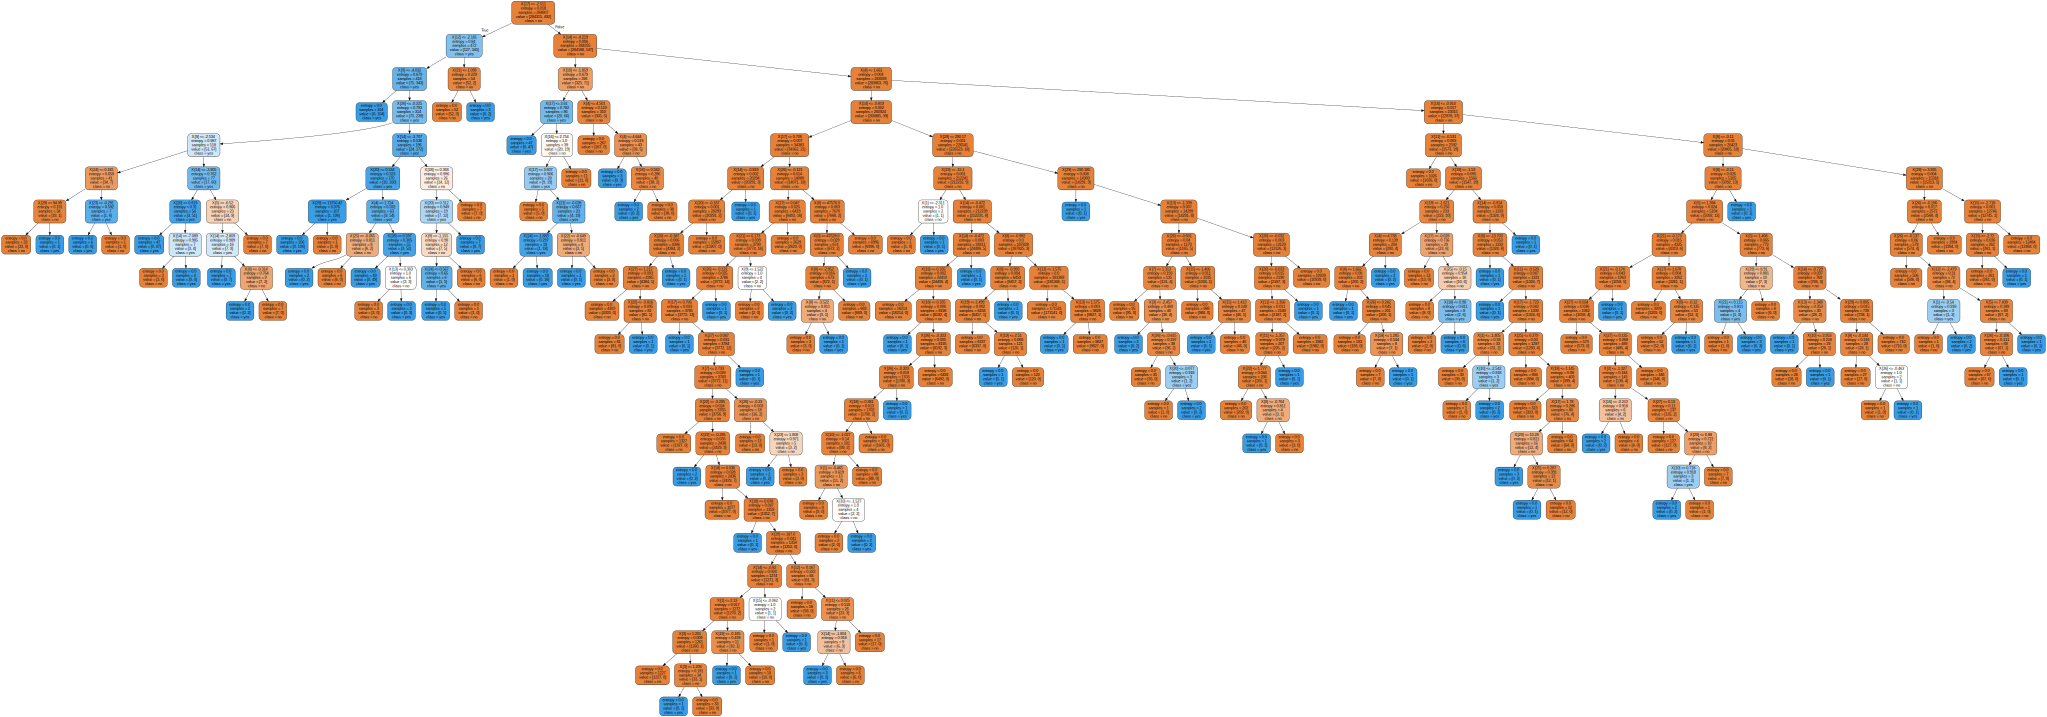

In [31]:
dot_data = export_graphviz(dt, 
                           out_file=None, 
                           class_names=['no', 'yes'],  
                           filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

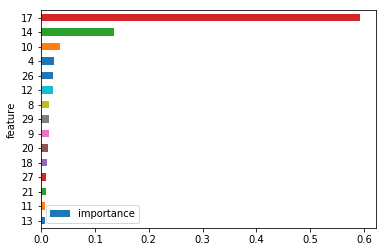

In [43]:
imps = pd.DataFrame({"importance":dt.feature_importances_,"feature":xpd.columns}).sort_values("importance")[15:]
imps.plot(x="feature",y="importance",kind="barh")

In [36]:
t.fit(v2.reshape(-1, 1),y)
t.score(v2.reshape(-1, 1),y)

0.99997893310206565

In [40]:
maus=cc[cc["Class"] ==1]
maus.head()
bons=cc[cc["Class"] ==0]
bons.head()

print(bons.shape)
print(maus.shape)

brandom=bons.sample(492, replace=False)
print(brandom.shape)

(284315, 31)
(492, 31)
(492, 31)


In [41]:
bal=maus.append(brandom)
bal.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [44]:
print(bal.shape)

(984, 31)


In [45]:
xbal =  bal.drop('Class',  axis=1).values
ybal =  bal['Class'].values

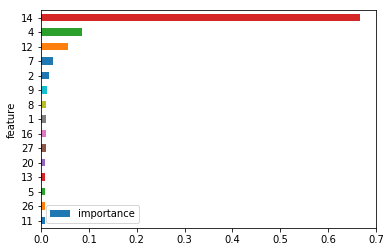

In [48]:
balt = DecisionTreeClassifier(criterion='entropy')
balt.fit(xbal, ybal)
imps = pd.DataFrame({"importance":balt.feature_importances_,"feature":xpd.columns}).sort_values("importance")[15:]
imps.plot(x="feature",y="importance",kind="barh")

In [79]:
logreg =  LogisticRegression()
xbtrain,  xbtest, ybtrain,  ybtest =  train_test_split(xbal, ybal, test_size=0.4,  random_state=144)
logreg.fit(xbtrain,  ybtrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

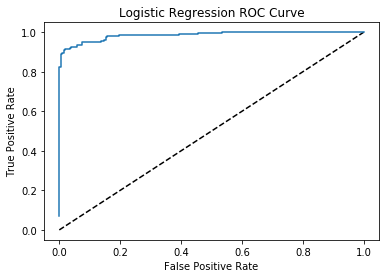

AUC logreg simples


0.98490712074303399

In [80]:
ybpred_prob =  logreg.predict_proba(xbtest)[:,1]
fpr, tpr,  thresholds =  roc_curve(ybtest,  ybpred_prob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,  tpr, label='Logistic  Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()
print("AUC logreg simples")
roc_auc_score(ybtest,  ybpred_prob)

In [81]:
boost = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.05)
xbtrain,  xbtest, ybtrain,  ybtest =  train_test_split(xbal, ybal, test_size=0.4,  random_state=144)
boost.fit(xbtrain, ybtrain, early_stopping_rounds=5,eval_set=[(xbtest, ybtest)], verbose=False)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.05, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

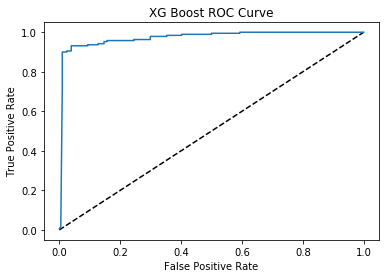

AUC XG boost


0.97258771929824561

In [82]:
ybpred_prob =  boost.predict(xbtest)
fpr, tpr,  thresholds =  roc_curve(ybtest,  ybpred_prob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,  tpr, label='XG Boost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XG Boost ROC Curve')
plt.show()
print("AUC XG boost")
roc_auc_score(ybtest,  ybpred_prob)

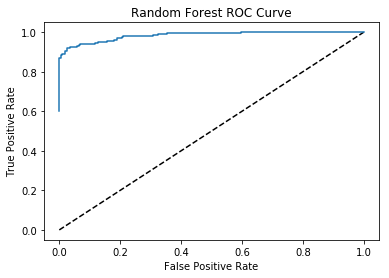

score random forest simples


0.93654822335025378

In [62]:
forest = RandomForestClassifier(max_depth = 10, min_samples_split=2, n_estimators = 100, random_state = 144)
forest.fit(xbtrain,  ybtrain)
ybpred_prob =  forest.predict_proba(xbtest)[:,1]
fpr, tpr,  thresholds =  roc_curve(ybtest,  ybpred_prob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,  tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()
print("AUC random forest simples")
roc_auc_score(ybtest,  ybpred_prob)

In [84]:
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
bagt = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
xbtrain,  xbtest, ybtrain,  ybtest =  train_test_split(xbal, ybal, test_size=0.4,  random_state=144)
bagt.fit(xbtrain,ybtrain)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=7, verbose=0, warm_start=False)

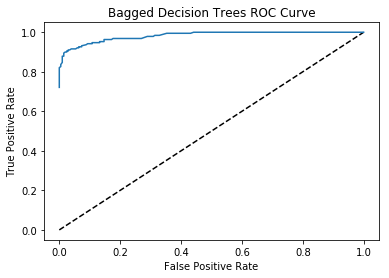

AUC bagged decision trees


0.98263673890608871

In [85]:
ybpred_prob =  bagt.predict_proba(xbtest)[:,1]
fpr, tpr,  thresholds =  roc_curve(ybtest,  ybpred_prob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,  tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Bagged Decision Trees ROC Curve')
plt.show()
print("AUC bagged decision trees")
roc_auc_score(ybtest,  ybpred_prob)

In [86]:
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cart = LogisticRegression()
est = 100
baglog = BaggingClassifier(base_estimator=cart, n_estimators=est, random_state=seed)
xbtrain,  xbtest, ybtrain,  ybtest =  train_test_split(xbal, ybal, test_size=0.4,  random_state=144)
baglog.fit(xbtrain,ybtrain)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=7, verbose=0, warm_start=False)

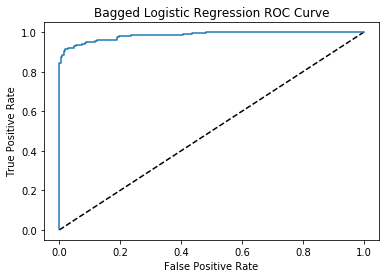

AUC bagged logreg


0.98446852425180587

In [87]:
ybpred_prob =  baglog.predict_proba(xbtest)[:,1]
fpr, tpr,  thresholds =  roc_curve(ybtest,  ybpred_prob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,  tpr, label='Logistic  Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Bagged Logistic Regression ROC Curve')
plt.show()
print("AUC bagged logreg")
roc_auc_score(ybtest,  ybpred_prob)